In [49]:
import numpy as np

In [63]:
class Linear_Regression():
    
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, X, Y):
        self.m, self.n = X.shape # number of rows & columns
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X =X
        self.Y = Y.reshape(self.m)
        #implement gradient decent
        for i in range(self.no_of_iterations):
            self.update_weigths()
        
    def update_weigths(self):
        Y_prediction = self.predict(self.X)
        
        dw = -(2* (self.X.T).dot(self.Y-Y_prediction))/self.m
        db = -2*np.sum(self.Y-Y_prediction)/self.m
        #updating weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    def predict(self,X):
        return X.dot(self.w)+self.b


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [53]:
df.shape

(30, 2)

In [54]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [56]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [57]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [58]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [73]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(24, 1) (6, 1) (24,) (6,)


### our model

In [74]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [75]:
model.fit(X_train,Y_train)

In [76]:
print("bias=",model.b)
print("weight=",model.w[0])

bias= 24384.029598697263
weight= 9570.888860991548


In [77]:
Y_pred_test = model.predict(X_test)

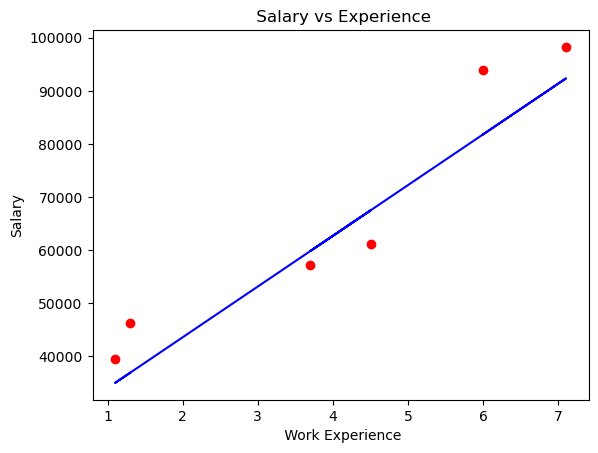

In [78]:
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,Y_pred_test,color="blue")
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()

### sklearn model

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model.fit(X_train,Y_train)

LinearRegression()

In [81]:
Y_pred_test = model.predict(X_test)

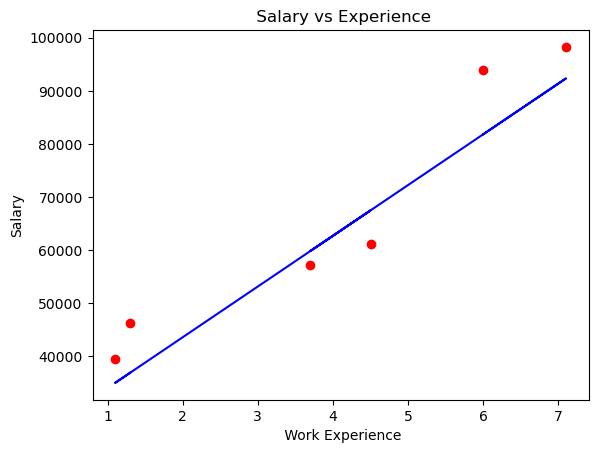

In [82]:
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,Y_pred_test,color="blue")
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()